___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
import pandas as pd
import numpy as np
import re

ri = pd.read_csv('police.csv', engine='python').sample(50000, random_state=101)

ri.drop(['county_name', 'county_fips', 'fine_grained_location', 'state'], axis=1, inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri['is_arrested'].astype({'is_arrested': 'bool'})

ri['stop_datetime'] = ri['stop_date'] + ' ' + ri['stop_time']
ri['stop_datetime'] = pd.to_datetime(ri['stop_datetime'])

ri.set_index('stop_datetime', inplace=True)

In [2]:
ri['is_arrested'].mean()

0.0347816871555744

In [5]:
ri['is_arrested'].value_counts(normalize=True)

False    0.965218
True     0.034782
Name: is_arrested, dtype: float64

In [3]:
sum((ri['is_arrested'] == True)) / sum((ri['is_arrested'] == False))

0.03603504688289159

In [54]:
ri.groupby(ri.index.hour)['is_arrested'].value_counts(normalize=True)

stop_datetime  is_arrested
0              False          0.954006
               True           0.045994
1              False          0.934521
               True           0.065479
2              False          0.934874
               True           0.065126
3              False          0.947811
               True           0.052189
4              False          0.968992
               True           0.031008
5              False          0.990291
               True           0.009709
6              False          0.985482
               True           0.014518
7              False          0.983655
               True           0.016345
8              False          0.982298
               True           0.017702
9              False          0.973239
               True           0.026761
10             False          0.973759
               True           0.026241
11             False          0.972545
               True           0.027455
12             False          0.96876

In [55]:
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].value_counts(normalize=True)

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [9]:
import matplotlib.pyplot as plt

In [10]:
hourly_arrest_rate.describe()

count    48.000000
mean      0.500000
std       0.469419
min       0.009709
25%       0.033003
50%       0.500000
75%       0.966997
max       0.990291
Name: is_arrested, dtype: float64

In [11]:
hourly_arrest_df = pd.DataFrame(hourly_arrest_rate)
hourly_arrest_df.head()
hourly_arrest_df = hourly_arrest_df.xs(True, level='is_arrested')
hourly_arrest_df.head()

,is_arrested
stop_datetime,
0,0.045994
1,0.065479
2,0.065126
3,0.052189
4,0.031008


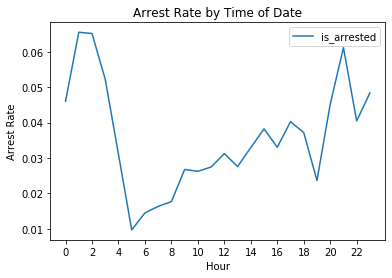

In [47]:
fig1=hourly_arrest_df.plot(title='Arrest Rate by Time of Date', xticks=range(0,24,2))
fig1.set_xlabel('Hour')
fig1.set_ylabel('Arrest Rate')
plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [127]:
#annual_drug_rate = ri.groupby(ri.index.year)['drugs_related_stop'].value_counts(normalize=False)
annual_drug_rate.head(5)

stop_datetime  drugs_related_stop
2005           False                 1356
               True                    14
2006           False                 5459
               True                    40
2007           False                 4957
Name: drugs_related_stop, dtype: int64

In [155]:
annual_drug_rate = ri.groupby(ri.index.year)['drugs_related_stop'].value_counts(normalize=True)
annual_drug_rate.head(5)

stop_datetime  drugs_related_stop
2005           False                 0.989781
               True                  0.010219
2006           False                 0.992726
               True                  0.007274
2007           False                 0.987450
Name: drugs_related_stop, dtype: float64

In [156]:
annual_drug_df = pd.DataFrame(annual_drug_rate)
annual_drug_df = annual_drug_df.xs(True, level='drugs_related_stop')
annual_drug_df.describe()

,drugs_related_stop
count,11.000000
mean,0.010631
std,0.002362
min,0.005704
25%,0.009864
50%,0.011448
75%,0.012542
max,0.012914


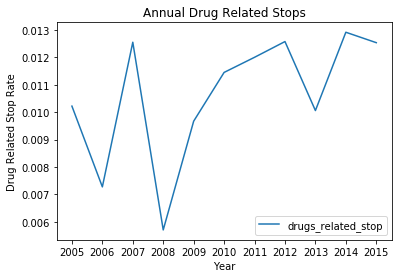

In [157]:
fig2=annual_drug_df.plot(title='Annual Drug Related Stops', xticks=range(2005,2016))
fig2.set_xlabel('Year')
fig2.set_ylabel('Drug Related Stop Rate')
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [158]:
#annual_search_rate = ri.groupby(ri.index.year)['search_conducted'].value_counts(normalize=False)

In [159]:
annual_search_rate = ri.groupby(ri.index.year)['search_conducted'].value_counts(normalize=True)

In [160]:
annual_search_rate.dtype

dtype('float64')

In [161]:
annual_search_rate.head()

stop_datetime  search_conducted
2005           False               0.948175
               True                0.051825
2006           False               0.962357
               True                0.037643
2007           False               0.952390
Name: search_conducted, dtype: float64

In [162]:
annual_search_df = pd.DataFrame(annual_search_rate)
annual_search_df = annual_search_df.xs(True, level='search_conducted')
annual_search_df.describe()

,search_conducted
count,11.000000
mean,0.038727
std,0.009077
min,0.025647
25%,0.032659
50%,0.037643
75%,0.046169
max,0.051825


In [163]:
annual_drug_rate.head()

stop_datetime  drugs_related_stop
2005           False                 0.989781
               True                  0.010219
2006           False                 0.992726
               True                  0.007274
2007           False                 0.987450
Name: drugs_related_stop, dtype: float64

In [164]:
annual = pd.concat([annual_search_rate, annual_drug_rate], axis=1)

In [165]:
annual.head()

search_conducted  drugs_related_stop
stop_datetime search_conducted                                      
2005          False                     0.948175            0.989781
              True                      0.051825            0.010219
2006          False                     0.962357            0.992726
              True                      0.037643            0.007274
2007          False                     0.952390            0.987450

In [166]:
annual = annual.xs(1, level = 1)

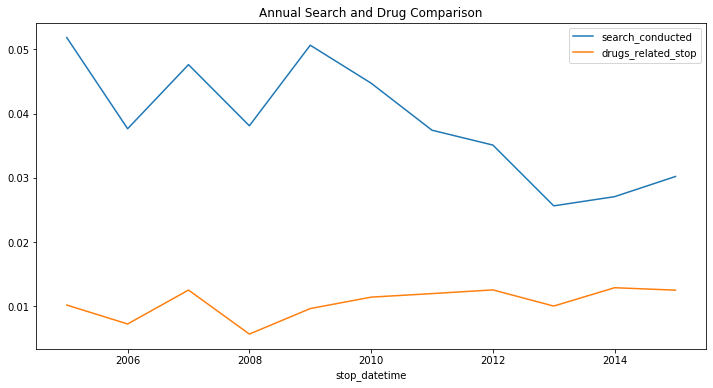

In [168]:
annual.plot(title= 'Annual Search and Drug Comparison', figsize=(12,6))

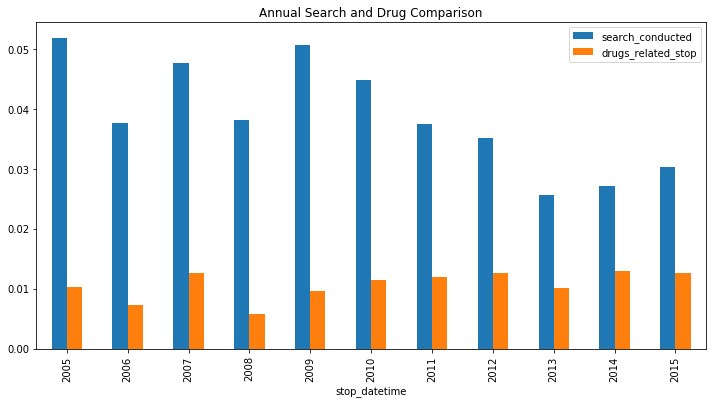

In [169]:
annual.plot.bar(title= 'Annual Search and Drug Comparison', figsize=(12,6))

It can easily seen that vehicle searches decrease while drug_related_stops increase.

In [151]:
ri_freq = pd.crosstab(ri['district'], columns='violation')

ri_freq.head()

col_0,violation
district,
Zone K1,4504
Zone K2,9519
Zone K3,10721
Zone X1,1300
Zone X3,8705


***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [171]:
all_zones = pd.crosstab(ri['district'], ri['violation'])

all_zones.head()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,374,709,143,64,0,3214
Zone K2,1154,1629,488,396,293,5559
Zone K3,1277,1597,370,374,356,6747
Zone X1,163,381,84,21,45,606
Zone X3,1175,1647,426,329,418,4710


In [172]:
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones.head()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,374,709,143,64,0,3214
Zone K2,1154,1629,488,396,293,5559
Zone K3,1277,1597,370,374,356,6747


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

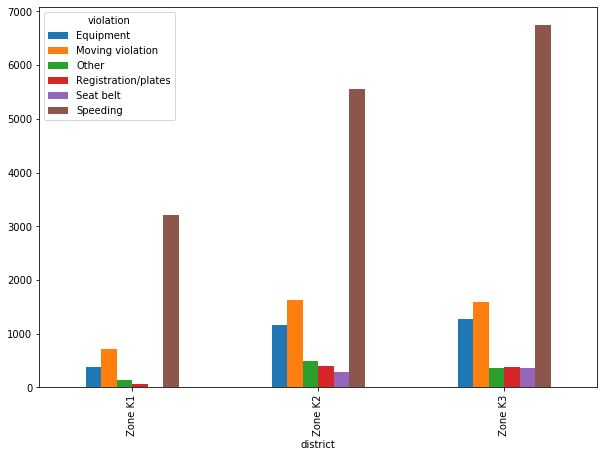

In [234]:
k_zones.plot.bar(figsize=(10,7))
plt.show()

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

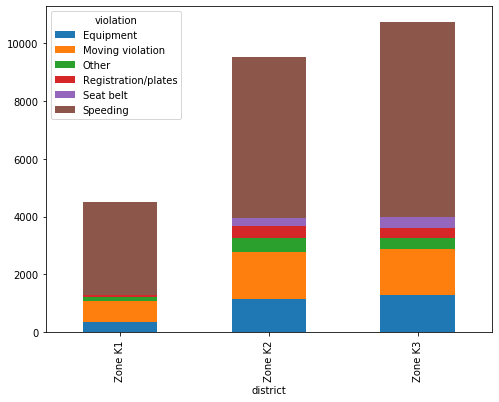

In [231]:
k_zones.plot.bar(stacked=True, figsize=(8,6))
plt.show()

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [178]:
ri['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '1'], dtype=object)

In [196]:
dura =[]
for i in ri['stop_duration']:
    if i == '0-15 Min':
        dura.append(8)
    elif i == '16-30 Min':
        dura.append(23)
    elif i == '30+ Min':
        dura.append(45)
    else:
        dura.append(8)
ri['stop_minutes'] = dura
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47180 entries, 2009-02-28 11:02:00 to 2013-03-21 11:54:00
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  47180 non-null  object 
 1   stop_date           47180 non-null  object 
 2   stop_time           47180 non-null  object 
 3   location_raw        47180 non-null  object 
 4   police_department   47180 non-null  object 
 5   driver_gender       47180 non-null  object 
 6   driver_age_raw      47180 non-null  float64
 7   driver_age          47018 non-null  float64
 8   driver_race_raw     47180 non-null  object 
 9   driver_race         47180 non-null  object 
 10  violation_raw       47180 non-null  object 
 11  violation           47180 non-null  object 
 12  search_conducted    47180 non-null  bool   
 13  search_type_raw     1778 non-null   object 
 14  search_type         1778 non-null   object 
 15  contraband_found  

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [219]:
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()
stop_length

violation_raw
APB                                 16.183673
Call for Service                    22.508065
Equipment/Inspection Violation      11.530556
Motorist Assist/Courtesy            18.876106
Other Traffic Violation             13.796369
Registration Violation              13.822556
Seatbelt Violation                   9.731123
Special Detail/Directed Patrol      14.901845
Speeding                            10.600329
Suspicious Person                   22.071429
Violation of City/Town Ordinance    13.615385
Warrant                             18.250000
Name: stop_minutes, dtype: float64

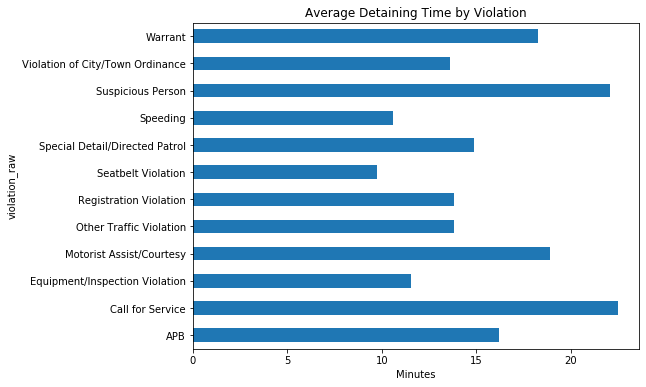

In [229]:
fig_stp = stop_length.plot.barh(x='stop_length', y='violation_raw', title='Average Detaining Time by Violation', figsize=(8,6))
fig_stp.set_xlabel('Minutes')
plt.show()